Duchenne Muscular Dystrophy (DMD) is a genetically transmitted disease, passed from a mother to her children. Affected female offspring usually suffer no apparent symptoms, male offspring with the disease die at young age. Although female carriers have no physical symptoms they tend to exhibit elevated levels of certain serum enzymes or proteins. 
The dystrophy dataset contains 209 observations of 75 female DMD carriers and 134 female DMD non-carrier. It includes 6 variables describing age of the female and the serum parameters serum marker creatine kinase (CK), serum marker hemopexin (H), serum marker pyruvate kinase (PK) and serum marker lactate dehydroginase (LD). The serum markers CK and H may be measured rather inexpensive from frozen serum, PK and LD requires fresh serum.

The first two serum markers, creatine kinase and hemopexin (ck,h), are inexpensive to obtain, while the last two, pyruvate kinase and lactate dehydroginase (pk,ld), are more expensive. It is of interest to measure how much pk and ld add toward predicting the carrier status. The importance of age and sample date is also of interest. Percy noted that the water supply for the lab changed during the study.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dystrophy = pd.read_csv('dystrophy.csv')

In [3]:
dystrophy.head()

,OBS,HospID,AGE,M,Y,CK,H,PK,LD,Class
0,1,1007,22,6,79,52.0,83.5,10.9,176.0,normal
1,1,786,32,8,78,20.0,77.0,11.0,200.0,normal
2,1,778,36,7,78,28.0,86.5,13.2,171.0,normal
3,1,1306,22,11,79,30.0,104.0,22.6,230.0,normal
4,1,895,23,1,78,40.0,83.0,15.2,205.0,normal


In [4]:
dystrophy = dystrophy.dropna()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

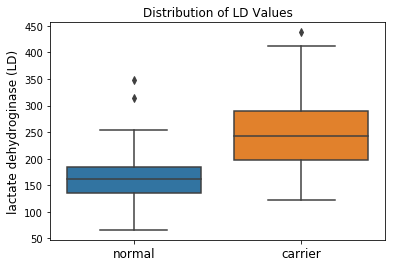

In [6]:
sns.boxplot(data = dystrophy, x = 'Class', y = 'LD')
plt.ylabel('lactate dehydroginase (LD)', fontsize = 12)
plt.xlabel('')
plt.xticks(fontsize = 12)
plt.title('Distribution of LD Values', fontsize = 12);

plt.savefig('LD_box.png')

In [7]:
dystrophy['carrier'] = (dystrophy.Class == 'carrier').astype('int')

In [8]:
dystrophy.head()

,OBS,HospID,AGE,M,Y,CK,H,PK,LD,Class,carrier
0,1,1007,22,6,79,52.0,83.5,10.9,176.0,normal,0
1,1,786,32,8,78,20.0,77.0,11.0,200.0,normal,0
2,1,778,36,7,78,28.0,86.5,13.2,171.0,normal,0
3,1,1306,22,11,79,30.0,104.0,22.6,230.0,normal,0
4,1,895,23,1,78,40.0,83.0,15.2,205.0,normal,0


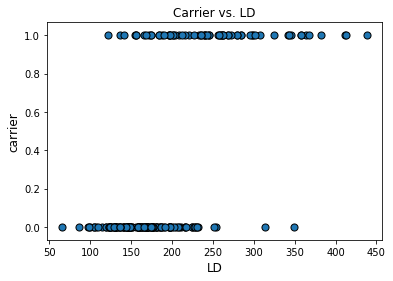

In [9]:
dystrophy.plot(x = 'LD', y = 'carrier', kind = 'scatter', edgecolor = 'black', s = 50)
plt.title('Carrier vs. LD')
plt.ylabel('carrier', fontsize = 12)
plt.xlabel('LD', fontsize = 12);

plt.savefig('scatter_01.png')

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()

In [12]:
X = dystrophy[['LD']]
y = dystrophy.carrier

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [15]:
dystrophy.head()

,OBS,HospID,AGE,M,Y,CK,H,PK,LD,Class,carrier
0,1,1007,22,6,79,52.0,83.5,10.9,176.0,normal,0
1,1,786,32,8,78,20.0,77.0,11.0,200.0,normal,0
2,1,778,36,7,78,28.0,86.5,13.2,171.0,normal,0
3,1,1306,22,11,79,30.0,104.0,22.6,230.0,normal,0
4,1,895,23,1,78,40.0,83.0,15.2,205.0,normal,0


In [16]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lin_reg.intercept_

-0.4552956473427786

In [18]:
lin_reg.coef_

array([0.00415135])

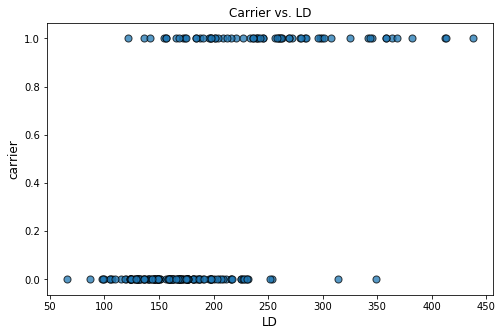

In [19]:
m = lin_reg.coef_[0]
b = lin_reg.intercept_

alpha = 0.75

x = np.linspace(start = X.min(), stop = X.max())
y = m*x + b

fig, ax = plt.subplots(figsize = (8,5))

dystrophy.plot(x = 'LD', y = 'carrier', kind = 'scatter', ax = ax, alpha = alpha, edgecolor = 'black', s = 50)
plt.plot(x = x, y = y)
plt.title('Carrier vs. LD')
plt.ylabel('carrier', fontsize = 12)
plt.xlabel('LD', fontsize = 12);

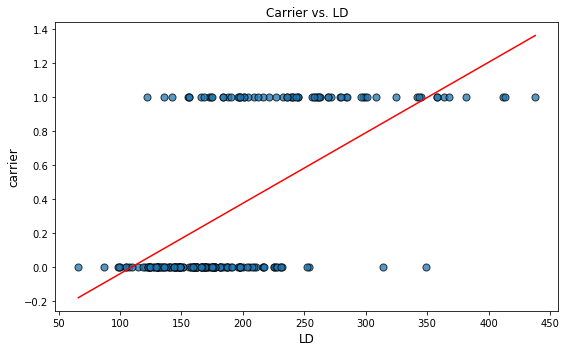

In [20]:
m = lin_reg.coef_[0]
b = lin_reg.intercept_

x = np.linspace(start = X.min(), stop = X.max())
y = m*x + b

alpha = 0.75

fig, ax = plt.subplots(figsize = (8,5))
dystrophy.plot(x = 'LD', y = 'carrier', kind = 'scatter', ax = ax, edgecolor = 'black', s = 50, alpha = alpha)
plt.plot(x, y, color = 'red')

plt.title('Carrier vs. LD')
plt.ylabel('carrier', fontsize = 12)
plt.xlabel('LD', fontsize = 12);

plt.tight_layout()
plt.savefig('scatter_02.png')

In [21]:
x = np.linspace(-5, 5, num = 250)
y = 1 / (1 + np.exp(-x))

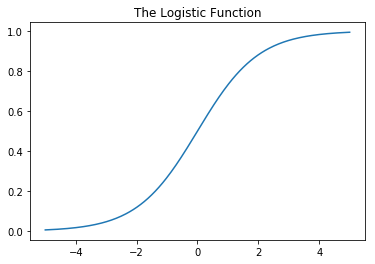

In [22]:
plt.plot(x, y)
plt.title('The Logistic Function');
plt.savefig('logistic.png')

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [24]:
lr = LogisticRegression()

In [25]:
le = LabelEncoder()
dystrophy['label'] = le.fit_transform(dystrophy.Class)

In [26]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
lr.coef_[0]

array([0.02791382])

In [28]:
lr.intercept_

array([-6.14919885])

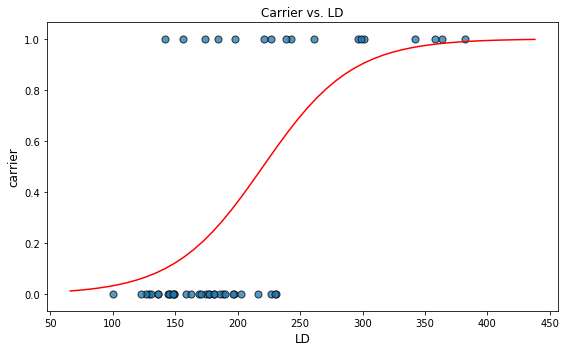

In [29]:
m = lr.coef_[0]
b = lr.intercept_

alpha = 0.75

x_log = np.linspace(start = X.LD.min(), stop = X.LD.max())
y_log = 1 / (1 + np.exp(-(m*x_log + b)))

df = dystrophy.loc[X_test.index]

fig, ax = plt.subplots(figsize = (8,5))
df.plot(x = 'LD', y = 'carrier', kind = 'scatter', ax = ax, alpha = alpha, s = 50, edgecolor = 'black')
plt.plot(x_log, y_log, color = 'red')

plt.title('Carrier vs. LD')
plt.ylabel('carrier', fontsize = 12)
plt.xlabel('LD', fontsize = 12);

plt.tight_layout()
plt.savefig('scatter_03.png')


In [30]:
y_pred = lr.predict(X_test)

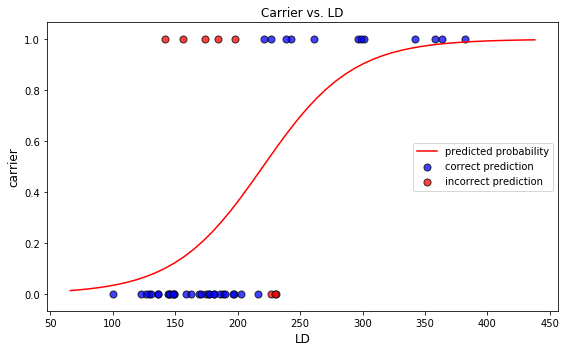

In [31]:
m = lr.coef_[0]
b = lr.intercept_

x_log = np.linspace(start = X.LD.min(), stop = X.LD.max())
y_log = 1 / (1 + np.exp(-(m*x_log + b)))

alpha = 0.75

fig, ax = plt.subplots(figsize = (8,5))

df = dystrophy.loc[X_test.index]

df[y_pred == df.carrier].plot(x = 'LD', y = 'carrier', kind = 'scatter', ax = ax, color = 'blue', 
               edgecolor = 'black', s= 50, label = 'correct prediction', alpha = alpha) 
df[y_pred != df.carrier].plot(x = 'LD', y = 'carrier', kind = 'scatter', ax = ax, color = 'red', 
               edgecolor = 'black', s= 50, label = 'incorrect prediction', alpha = alpha) 
plt.plot(x_log, y_log, color = 'red', label = 'predicted probability')

plt.legend(loc = 'right')

plt.title('Carrier vs. LD')
plt.ylabel('carrier', fontsize = 12)
plt.xlabel('LD', fontsize = 12);

plt.tight_layout()
plt.savefig('scatter_04.png')


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, filename = None, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(object)
    annot_kws = {'fontsize': 8, 'fontweight' : 'bold'}
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j == 0:
                s = cm_sum[i]
                annot[i, j] = 'True Negatives:\n %.1f%%\n%d/%d' % (p, c, s) 
            elif i == j == 1:
                s = cm_sum[i]
                annot[i, j] = 'True Positives:\n %.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            elif i == 0 and j == 1:
                s = cm_sum[i]
                annot[i, j] = 'False Positives:\n %.1f%%\n%d/%d' % (p, c, s)
            else:
                s = cm_sum[i]
                annot[i, j] = 'False Negatives:\n %.1f%%\n%d/%d' % (p, c, s)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, linewidths = 2, linecolor = 'black', annot_kws = annot_kws,
               cmap = 'Blues')
    if filename:
        plt.savefig(filename)

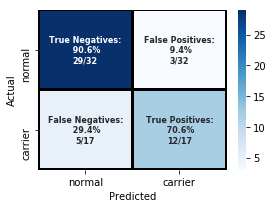

In [33]:
df = dystrophy.loc[X_test.index]
cm_analysis(le.inverse_transform(df.label),
            le.inverse_transform(1 - y_pred), labels = ['normal', 'carrier'],
           figsize = (4,3))
plt.tight_layout()
plt.savefig('cm.png', dpi = 150)

In [34]:
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt

def calibration_curve(y_true, y_prob, n_bins=5,
                      strategy='quantile', alpha = 0.05,
                     figsize = (6,4), original_data = True):
    """Compute true and predicted probabilities for a calibration curve.
    The method assumes the inputs come from a binary classifier.
    Calibration curves may also be referred to as reliability diagrams.
    Read more in the :ref:`User Guide <calibration>`.
    Parameters
    ----------
    y_true : array, shape (n_samples,)
        True targets.
    y_prob : array, shape (n_samples,)
        Probabilities of the positive class.
    normalize : bool, optional, default=False
        Whether y_prob needs to be normalized into the bin [0, 1], i.e. is not
        a proper probability. If True, the smallest value in y_prob is mapped
        onto 0 and the largest one onto 1.
    n_bins : int
        Number of bins. A bigger number requires more data. Bins with no data
        points (i.e. without corresponding values in y_prob) will not be
        returned, thus there may be fewer than n_bins in the return value.
    strategy : {'uniform', 'quantile'}, (default='quantile')
        Strategy used to define the widths of the bins.
        uniform
            All bins have identical widths.
        quantile
            All bins have the same number of points.
    References
    ----------
    Alexandru Niculescu-Mizil and Rich Caruana (2005) Predicting Good
    Probabilities With Supervised Learning, in Proceedings of the 22nd
    International Conference on Machine Learning (ICML).
    See section 4 (Qualitative Analysis of Predictions).
    """
    if strategy == 'quantile':  # Determine bin edges by distribution of data
        quantiles = np.linspace(0, 1, n_bins + 1)
        bins = np.percentile(y_prob, quantiles * 100)
        bins[-1] = bins[-1] + 1e-8
    elif strategy == 'uniform':
        bins = np.linspace(0., 1. + 1e-8, n_bins + 1)
    else:
        raise ValueError("Invalid entry to 'strategy' input. Strategy "
                         "must be either 'quantile' or 'uniform'.")

    binids = np.digitize(y_prob, bins) - 1

    bin_sums = np.bincount(binids, weights=y_prob, minlength=len(bins))
    bin_true = np.bincount(binids, weights=y_true, minlength=len(bins))
    bin_total = np.bincount(binids, minlength=len(bins))
    
    lower_bound = np.zeros_like(bin_total).astype('float')
    upper_bound = np.zeros_like(bin_total).astype('float')
    
    for i, (count, nobs) in enumerate(zip(bin_true, bin_total)):
        if nobs != 0:
            lower_bound[i], upper_bound[i] = proportion_confint(count = count, nobs = nobs, alpha = alpha)
        else:
            pass
        

    nonzero = bin_total != 0
    prob_true = (bin_true[nonzero] / bin_total[nonzero])
    prob_pred = (bin_sums[nonzero] / bin_total[nonzero])
    
    lower_bound = lower_bound[nonzero]
    upper_bound = upper_bound[nonzero]
    
    fig, ax = plt.subplots(figsize = figsize)
    
    plt.scatter(prob_pred, prob_true, edgecolor = 'black')
    # Add the confidence intervals:
    for lb, ub, x in zip(lower_bound, upper_bound, prob_pred):
        plt.plot([x, x], [lb, ub], color = 'black')
    
    # Include the original data
    if original_data:
        plt.scatter(y_prob, 1.1*y_true - 0.05, alpha = 0.5, color = 'red', zorder = -5)
    
    plt.plot([-0.05, 1.05], [-0.05, 1.05], color = 'black', linestyle = '--')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Truth')
    plt.title('Calibration Curve')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    #return prob_true, prob_pred, lower_bound, upper_bound

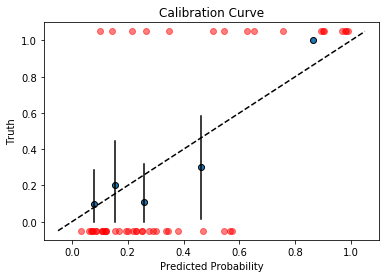

In [35]:
df = dystrophy.loc[X_test.index]
y_proba = lr.predict_proba(X_test)
calibration_curve(df.carrier, y_proba[:,1], n_bins = 5, strategy = 'quantile')
plt.savefig('calib_01.png', dpi = 150)

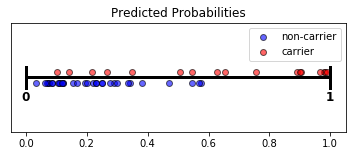

In [36]:
alpha = 0.6

fig, ax = plt.subplots(figsize = (6,2))
plt.scatter(y_proba[y_test==0,1], (np.zeros_like(y_test) - 0.05 + 0.1*(y_test == 1))[y_test==0], 
            c = 'blue', label = 'non-carrier', 
            alpha = alpha, edgecolor = 'black')
plt.scatter(y_proba[y_test==1,1], (np.zeros_like(y_test) - 0.05 + 0.1*(y_test == 1))[y_test==1], 
            c = 'red', label = 'carrier', 
            alpha = alpha, edgecolor = 'black')

plt.plot([-.0,1.], [0,0], linewidth = 3, color = 'black')


for i in [0,1]:
    plt.plot([i,i], [0.1, -0.1], linewidth = 3, color = 'black')
    plt.annotate(s = str(i), xy = (i, -0.125), ha = 'center', va = 'top', fontsize = 12, fontweight = 'bold')

plt.title("Predicted Probabilities")

plt.yticks([])

plt.legend()
plt.ylim(-0.5, 0.5);
plt.savefig('pred_proba_01.png', dpi = 150)

In [37]:
def calc_tpr(y_true, y_prob, threshold = 0.5):
    tp = len(y_prob[(y_true == 1) & (y_prob >= threshold)])
    tpr = tp / np.sum(y_true == 1)
    
    return tpr

def calc_fpr(y_true, y_prob, threshold = 0.5):
    fp = len(y_prob[(y_true == 0) & (y_prob >= threshold)])
    fpr = fp / np.sum(y_true == 0)
    
    return fpr

In [38]:
def tpr_fpr(y_true, y_prob):
    thresholds = np.linspace(start = 0, stop = 1, num = 100)
    tpr = [calc_tpr(y_true, y_prob, threshold) for threshold in thresholds]
    fpr = [calc_fpr(y_true, y_prob, threshold) for threshold in thresholds]
    return tpr, fpr

In [39]:
import numpy as np
def roc_curve(y_true, y_prob, area = False):
    tpr, fpr = tpr_fpr(y_true, y_prob)
    
    roc_plot = plt.plot(fpr, tpr)
    if area:
        plt.fill_between(fpr, tpr, color = 'lightblue')
    plt.plot([0,1], [0,1], color = 'black')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    return roc_plot;

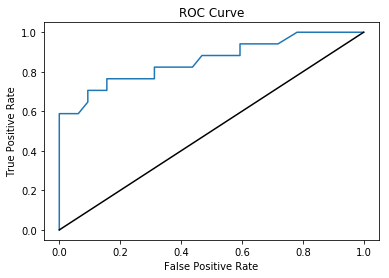

In [40]:
roc_plot = roc_curve(y_test, y_proba[:,1])
plt.savefig('roc_01.png', dpi = 150)

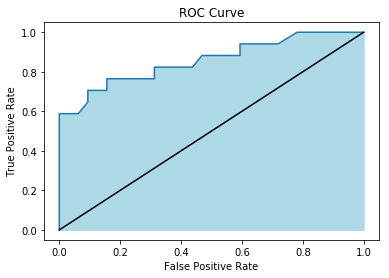

In [41]:
roc_plot = roc_curve(y_test, y_proba[:,1], area = True)
plt.savefig('roc_02.png', dpi = 150)

In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
roc_auc_score(y_test, y_proba[:,1])

0.8538602941176471

In [44]:
from ipywidgets import interact, FloatSlider, fixed
from matplotlib import gridspec

In [45]:
tpr, fpr = tpr_fpr(y_test, y_proba[:,1])

In [46]:
@interact(threshold = FloatSlider(value = 0.5, min = 0, max = 1, step = 0.01, continuous_update = False),
         y_true = fixed(y_test),
         y_prob = fixed(y_proba[:,1]),
         tpr = fixed(tpr),
         fpr = fixed(fpr),
         alpha = fixed(0.6))
def roc_interact(threshold, y_true, y_prob, tpr, fpr, alpha = 0.6):
    fig = plt.figure(figsize=(7, 7)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3]) 
    
    ax0 = plt.subplot(gs[0])
    
    ax0.scatter(y_prob[y_true==0], (np.zeros_like(y_true).astype(float) - 0.05 + 0.1*(y_true == 1))[y_true==0], 
            c = 'blue', label = 'non-carrier', 
            alpha = alpha, edgecolor = 'black')
    ax0.scatter(y_prob[y_true==1], (np.zeros_like(y_true).astype(float) - 0.05 + 0.1*(y_true == 1))[y_true==1], 
            c = 'red', label = 'carrier', 
            alpha = alpha, edgecolor = 'black')
    ax0.plot([-.0,1.], [0,0], linewidth = 3, color = 'black')
    for i in [0,1]:
        ax0.plot([i,i], [0.1, -0.1], linewidth = 3, color = 'black')
        ax0.annotate(s = str(i), xy = (i, -0.125), ha = 'center', va = 'top', fontsize = 12, fontweight = 'bold')
        
    ax0.plot([threshold, threshold], [-0.4, 0.4], color = 'red', linestyle = '--', linewidth = 3)
    
    ax0.title.set_text("Predicted Probabilities")
    plt.sca(ax0)
    plt.yticks([])
    plt.legend(loc = 'upper right')
    ax0.set_ylim(-0.5, 0.75); 
    
    ax1 = plt.subplot(gs[1])
    
    ax1.plot(fpr, tpr, linewidth = 1.5)
    ax1.plot([0,1], [0,1], color = 'black')
    
    plt.sca(ax1)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    ax1.scatter([calc_fpr(y_true, y_prob, threshold)], [calc_tpr(y_true, y_prob, threshold)], color = 'black', zorder = 500);

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='threshold', max=1.0, step=0…

In [47]:
dystrophy.columns

Index(['OBS', 'HospID', 'AGE', 'M', 'Y', 'CK', 'H', 'PK', 'LD', 'Class',
       'carrier', 'label'],
      dtype='object')

In [48]:
X_train = dystrophy.loc[X_train.index, ['CK', 'H', 'PK', 'LD']]
X_test = dystrophy.loc[X_test.index, ['CK', 'H', 'PK', 'LD']]

In [49]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
lr.intercept_[0]

-17.225433985156112

In [51]:
lr.coef_[0]

array([0.04461055, 0.11634145, 0.08745461, 0.0121529 ])

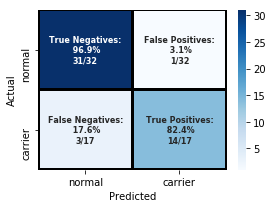

In [53]:
y_pred = lr.predict(X_test)

df = dystrophy.loc[X_test.index]

cm_analysis(le.inverse_transform(df.label),
            le.inverse_transform(1 - y_pred), labels = ['normal', 'carrier'],
           figsize = (4,3))
plt.tight_layout()
plt.savefig('cm_2.png', dpi = 150)

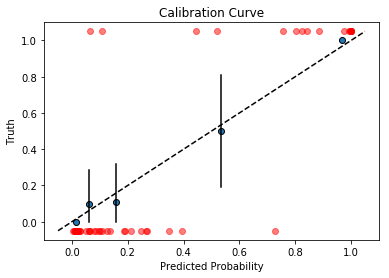

In [54]:
y_proba = lr.predict_proba(X_test)
calibration_curve(y_test, y_proba[:,1], n_bins = 5, strategy = 'quantile')
plt.savefig('calib_02.png', dpi = 150)

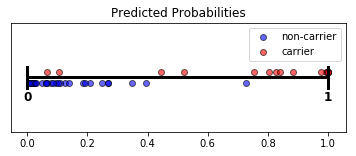

In [57]:
alpha = 0.6

fig, ax = plt.subplots(figsize = (6,2))

plt.scatter(y_proba[y_test==0,1], (np.zeros_like(y_test) - 0.05 + 0.1*(y_test == 1))[y_test==0], 
            c = 'blue', label = 'non-carrier', 
            alpha = alpha, edgecolor = 'black')
plt.scatter(y_proba[y_test==1,1], (np.zeros_like(y_test) - 0.05 + 0.1*(y_test == 1))[y_test==1], 
            c = 'red', label = 'carrier', 
            alpha = alpha, edgecolor = 'black')

plt.plot([-.0,1.], [0,0], linewidth = 3, color = 'black')


for i in [0,1]:
    plt.plot([i,i], [0.1, -0.1], linewidth = 3, color = 'black')
    plt.annotate(s = str(i), xy = (i, -0.125), ha = 'center', va = 'top', fontsize = 12, fontweight = 'bold')

plt.title("Predicted Probabilities")

plt.yticks([])

plt.legend()
plt.ylim(-0.5, 0.5);
plt.savefig('pred_proba_02.png', dpi = 150)


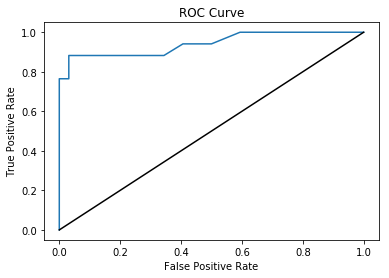

In [58]:
roc_plot = roc_curve(y_test, y_proba[:,1])
plt.savefig('roc_03.png', dpi = 150)

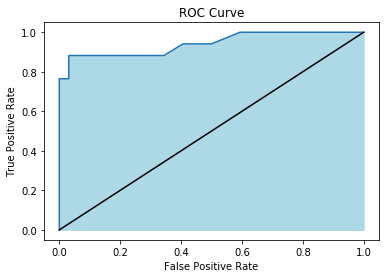

In [60]:
roc_plot = roc_curve(y_test, y_proba[:,1], area = True)
plt.savefig('roc_04.png', dpi = 150)

In [61]:
roc_auc_score(y_test, y_proba[:,1])

0.9430147058823529

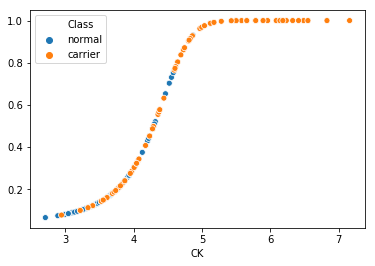

In [41]:
sns.scatterplot(x = np.log(dystrophy.CK), y = lr.predict_proba(X)[:,0], hue = y);

In [43]:
lr.predict_proba(np.array([58]).reshape(1,-1))

array([[0.33304343, 0.66695657]])

In [44]:
lr.predict_proba(np.array([200]).reshape(1,-1))

array([[0.99698034, 0.00301966]])

In [45]:
dystrophy.head()

,OBS,HospID,AGE,M,Y,CK,H,PK,LD,Class
0,1,1007,22,6,79,52.0,83.5,10.9,176.0,normal
1,1,786,32,8,78,20.0,77.0,11.0,200.0,normal
2,1,778,36,7,78,28.0,86.5,13.2,171.0,normal
3,1,1306,22,11,79,30.0,104.0,22.6,230.0,normal
4,1,895,23,1,78,40.0,83.0,15.2,205.0,normal


In [49]:
dystrophy.groupby('Class').PK.mean()

Class
carrier    23.932836
normal     12.145522
Name: PK, dtype: float64

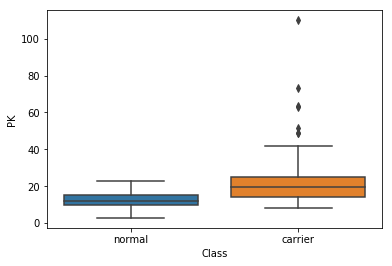

In [50]:
sns.boxplot(data = dystrophy, x = 'Class', y = 'PK')

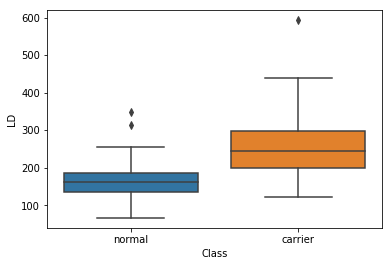

In [52]:
sns.boxplot(data = dystrophy, x = 'Class', y = 'LD');

In [57]:
dystrophy = dystrophy.dropna()

In [60]:
X = dystrophy[['LD']]
y = dystrophy.Class

In [61]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
lr.coef_[0]

array([-0.02904558])

In [63]:
dystrophy.shape

(194, 10)